In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt


###### Datas

In [63]:
columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
           'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
           'Normal Nucleoli', 'Mitoses', 'Class']

data = pd.read_csv('breast-cancer-wisconsin.data', names=columns, na_values='?')

data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'], errors='coerce')
data = data.set_index('Sample code number')
# ?
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)


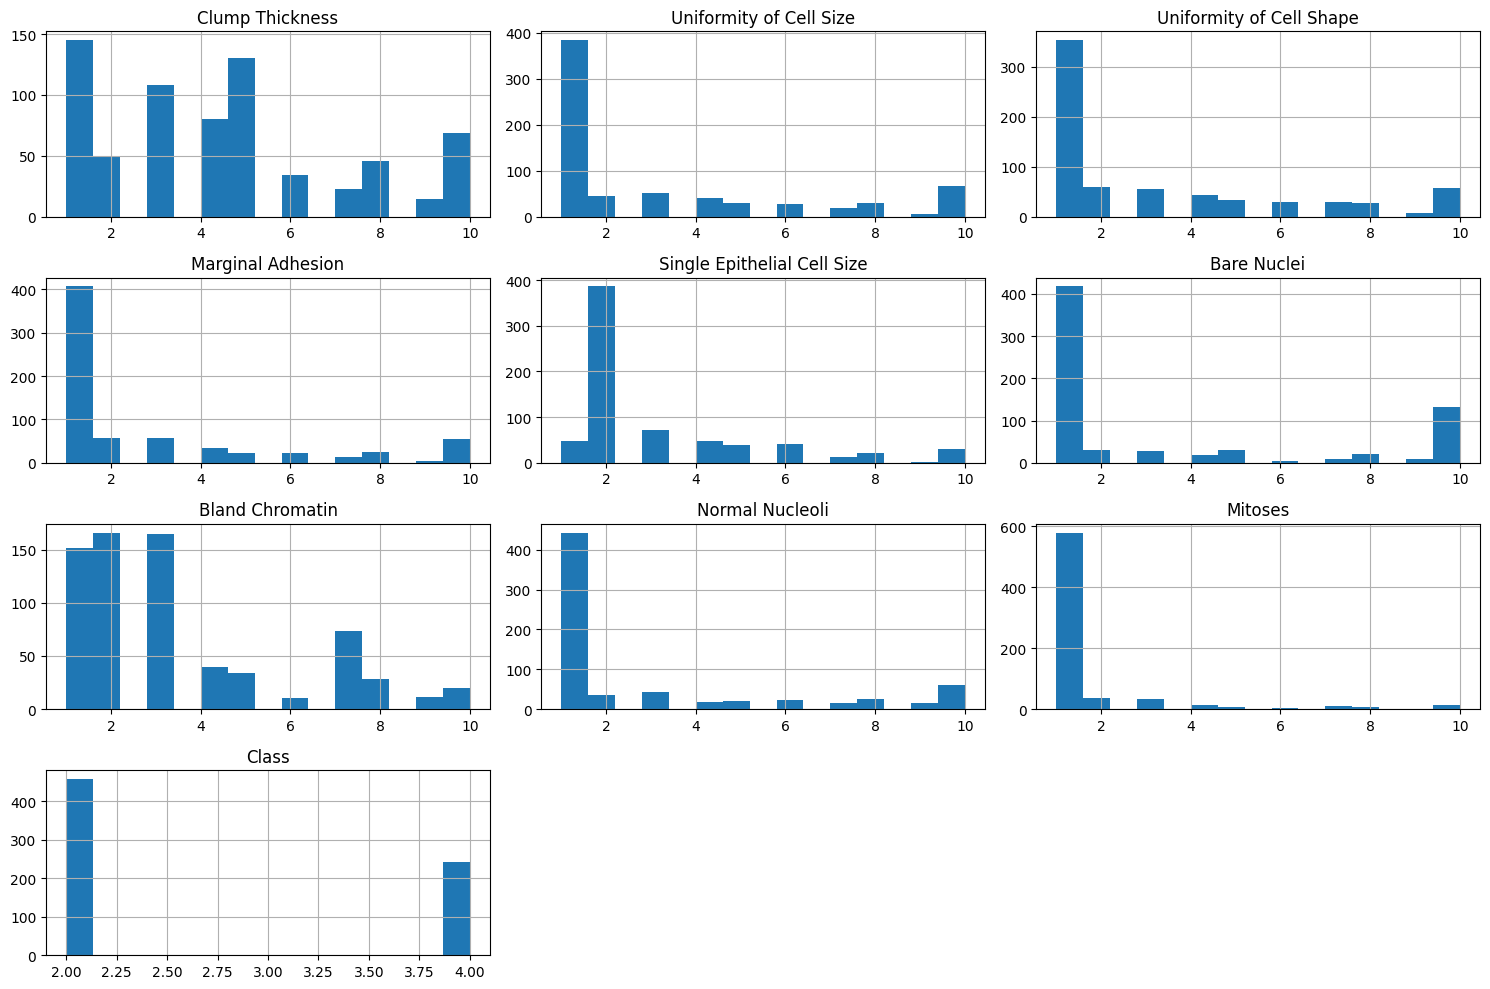

Valeurs manquantes avant imputation :
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
Proportion of Benign class: 0.6552217453505007
Accuracy if always predicting Benign: 0.66

Proportion of Benign in train set: 0.6547406082289803
Proportion of Benign in test set: 0.6571428571428571

# Train
Class prediction on train set (first 10):
[4. 2. 4. 2. 2. 2. 2. 4. 2. 2.]

Probability prediction on train set (first 10):
[0.99600525 0.00908951 0.99992741 0.00528932 0.02098032 0.00582947
 0.03566504 0.99515453 0.00788556 0.01065907]

Score on train set: 0.9695885509838998

# Test
Class prediction on test set (first 10):
[2. 2. 2. 4. 2. 4. 2. 2. 2. 4.]

Probability prediction on test set (first 10

In [64]:
# Prepare features and target
# ?
X = data_imputed.drop('Class', axis=1)
y = data_imputed['Class']

data_imputed.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Test
# Vérifier les valeurs manquantes avant l'imputation
print("Valeurs manquantes avant imputation :")
print(data.isnull().sum())

# 1. Proportion of Benign class
# ?
benign_prop = (y == 2).mean()

print(f"Proportion of Benign class: {benign_prop:.16f}")
print(f"Accuracy if always predicting Benign: {benign_prop:.2f}")

# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=43)

print(f"\nProportion of Benign in train set: {(y_train == 2).mean():.16f}")
print(f"Proportion of Benign in test set: {(y_test == 2).mean():.16f}")

# 3. Fit Logistic Regression and predict
model = LogisticRegression(random_state=43)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_proba = model.predict_proba(X_train)[:, 1]
test_proba = model.predict_proba(X_test)[:, 1]

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("\n# Train")
print("Class prediction on train set (first 10):")
print(y_train_pred[:10])
print("\nProbability prediction on train set (first 10):")
print(train_proba[:10])
print(f"\nScore on train set: {train_score:.16f}")

print("\n# Test")
print("Class prediction on test set (first 10):")
print(y_test_pred[:10])
print("\nProbability prediction on test set (first 10):")
print(test_proba[:10])
print(f"\nScore on test set: {test_score:.16f}")

# 4. Compute confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix (Train set):")
print(train_cm)
print("\nConfusion Matrix (Test set):")
print(test_cm)

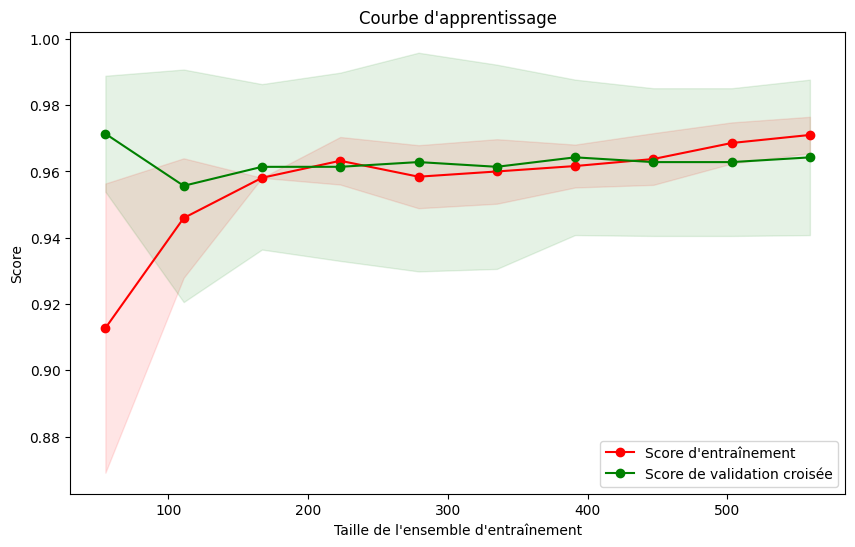

In [65]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    LogisticRegression(random_state=43), X, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score d'entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score de validation croisée")
plt.legend(loc="best")
plt.show()

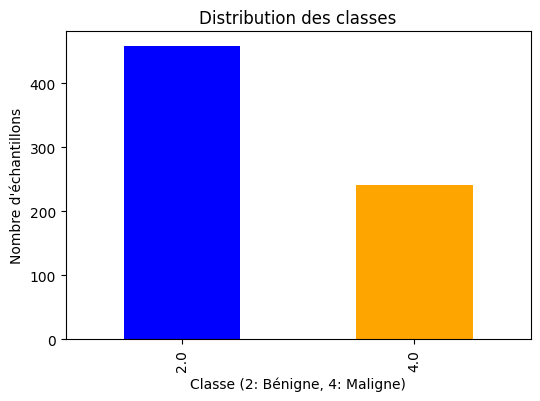

In [66]:
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribution des classes")
plt.xlabel("Classe (2: Bénigne, 4: Maligne)")
plt.ylabel("Nombre d'échantillons")
plt.show()
